# Week 11: Genetic drift and simulating the Buri experiment
<hr>

In [3]:
import numpy as np
import numba
import random
import matplotlib.pyplot as plt
import scipy.integrate

import seaborn as sns
sns.set(font_scale = 1.5, rc={"lines.linewidth":2})

## Simulating a single vial of a Buri experiment

Let's simulate how a single vial might drift over time in the Buri experiment. We will first initialize some parameters: 

In [2]:
# number of flies in each vial
n_flies = 16

# number of generations to run the simulation
n_generations = 20

# initilaize an array to store the frequency of the red allele
r_freq = np.zeros(n_generations)
r_freq[0] = 0.5
r_freq

array([0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. ])

How will the allele frequency change over time for our vial? Using the "bag of alleles" approximation, we will draw the next generation's 32 alleles, each with a `0.5` chance of being red. For this we can use `np.random.binomial(n, p)`, where `n` will be the number of alleles we want and `p` will be the probability of grabbing a red allele out of our "bag". 

As an example:

In [4]:
n = n_flies * 2
p = 0.5

# how many red alleles do we get?
np.random.binomial(n, p) 

13

If you run that cell repeatedly, you'll see that the average result will be that 16 alleles will be red, but this value can vary.

Using this approach for generating the next generation's red allele frequency, let's simulate a single vial over time, updating the frequency at each generation:

In [5]:
for i in range(1, n_generations):
    p = r_freq[i-1]
    num_red = np.random.binomial(n_flies*2, p) 
    new_r_freq = num_red / (n_flies*2)
    r_freq[i] = new_r_freq

r_freq

array([0.5    , 0.40625, 0.25   , 0.03125, 0.03125, 0.03125, 0.03125,
       0.0625 , 0.0625 , 0.03125, 0.09375, 0.0625 , 0.09375, 0.15625,
       0.28125, 0.21875, 0.09375, 0.0625 , 0.0625 , 0.0625 ])

Plotting the results. Does the red or white allele become fixed?

(0.0, 1.0)

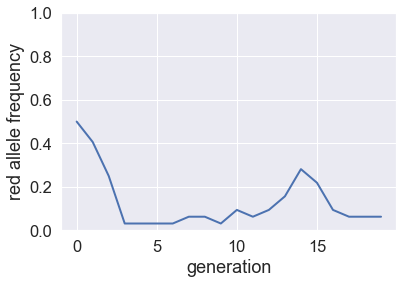

In [6]:
plt.plot(r_freq)
plt.xlabel("generation")
plt.ylabel("red allele frequency")
plt.ylim([0,1])

## Problem 1 -- Simulating the full Buri experiment

Extend what we've done so far to model the entire Buri experiment, tracking 107 vials over 20 generations. For this, we will want to use a 2D-array, such as `red_freq = np.zeros([n_vials, n_generations])` to store our allele frequencies in. 

Plot the distribution of the red allele frequency at the end of the 20 generations as a histogram. It should look something like this: 

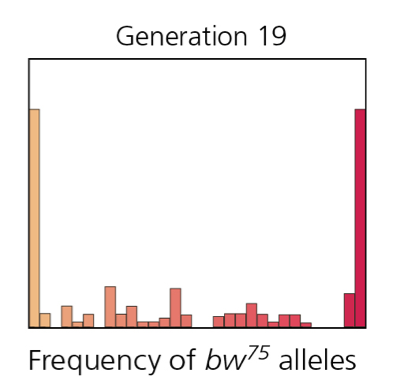

## Problem 2 -- Modifying the population size

Rerun your simulation for `n_flies = 8` and `n_flies = 32` and plot your results. From your results, how do population size and genetic drift relate? 

## Problem 3 -- Modifying the number of generations

Returning to `n_flies = 16`, run the simulation for 100 generations and plot your results. From your results, what role does time seem to play in genetic drift?

## Problem 4 -- Going beyond "bag of alleles"

So far we have assumed that all 32 alleles can be drawn with equal probability to make the next generation, but this ignores the fact that the alleles actually exist in discrete individuals and they can't be drawn quite that randomly. For this, we will construct a population as a list of lists, where each item in the list represents a fly, and the list of `0`s and `1`s represents which alleles that fly has. (`1` corresponds to the red allele and `0` corresponds to the white allele). The initial Buri population will look like this:

In [5]:
# 16 orange flies, each with a red (1) and white (0) aelele 
pop = np.array([[1,0]] * n_flies)
pop

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0]])

Model this population over time, taking the following steps:

- Pick two flies at random from the population
- From each fly, pick an allele at random
- Use these two alleles to generate a new fly and save it as part of a new population
- Repeat this process `n_flies` times until you have produced a new population of 16 files
    
With this new population in hand, you can record the new frequency of the red allele and repeat the whole process again for 20 generations. Plot the frequency of the red allele over time for this vial. For now we won't worry about simulating this for 107 vials.